In [1]:
import boto3
import pandas as pd
import io
from botocore.exceptions import ClientError

In [2]:
def read_csv_from_s3_with_options(bucket_name, file_key, **kwargs):
    """
    Enhanced version with additional pandas read_csv options
    
    Parameters:
    bucket_name (str): Name of the S3 bucket
    file_key (str): Path to the CSV file in the bucket
    **kwargs: Additional arguments to pass to pd.read_csv()
    
    Returns:
    pandas.DataFrame: DataFrame containing the CSV data
    """
    try:
        # Create an S3 client
        s3_client = boto3.client('s3')
        
        # Get the object from S3
        response = s3_client.get_object(Bucket=bucket_name, Key=file_key)
        
        # Read the CSV content with additional options
        df = pd.read_csv(io.BytesIO(response['Body'].read()), **kwargs)
        
        return df
    
    except Exception as e:
        print(f"Error reading CSV file from S3: {str(e)}")
        raise

# Example usage with options
if __name__ == "__main__":
    try:
        bucket_name = "birdsbucker"
        file_key = "trainingdata/training_data.csv"
        
        # Example with additional pandas read_csv options
        df = read_csv_from_s3_with_options(
            bucket_name,
            file_key,
            delimiter=',',
            encoding='utf-8',
            na_values=['NA', 'missing']
        )
        
        print("DataFrame shape:", df.shape)
        print("\nFirst few rows:")
        print(df.head())
        
    except Exception as e:
        print(f"Error in main: {str(e)}")

DataFrame shape: (24, 10)

First few rows:
  Segment      Lat     Long  Year  Daily Traffic Volume  % cars  % trucks  \
0      DC  38.9072 -77.0369  2019                200000      40        15   
1      DC  38.9072 -77.0369  2020                150000      45        10   
2      DC  38.9072 -77.0369  2021                170000      42        15   
3      DC  38.9072 -77.0369  2022                190000      38        15   
4      DC  38.9072 -77.0369  2023                204000      36        15   

   % suvs   Noise level (db)  total_birds  
0       45         75.560300       2776.0  
1       45         73.910913       1376.0  
2       43         74.794489       3576.0  
3       47         75.397536       1266.0  
4       49         75.766302       2141.0  


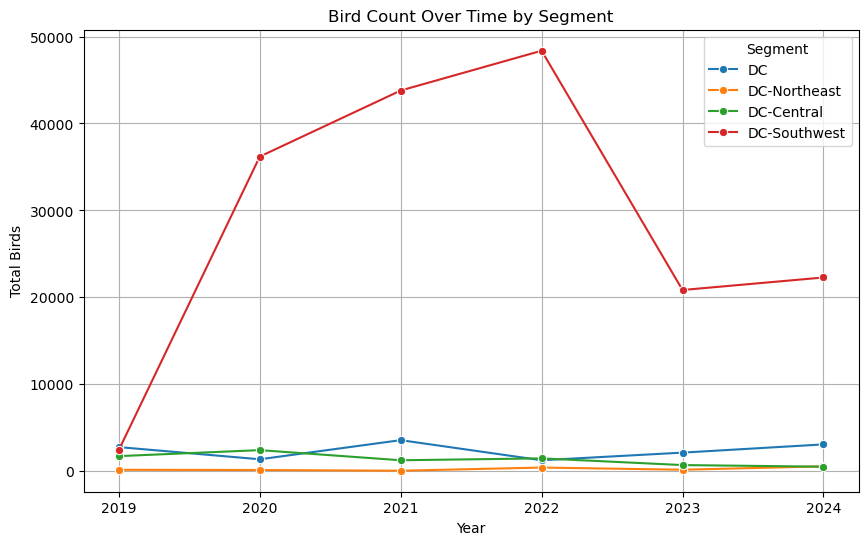

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lineplot of total birds over the years by segment
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='total_birds', hue='Segment', marker='o')
plt.title("Bird Count Over Time by Segment")
plt.ylabel("Total Birds")
plt.grid(True)
plt.show()

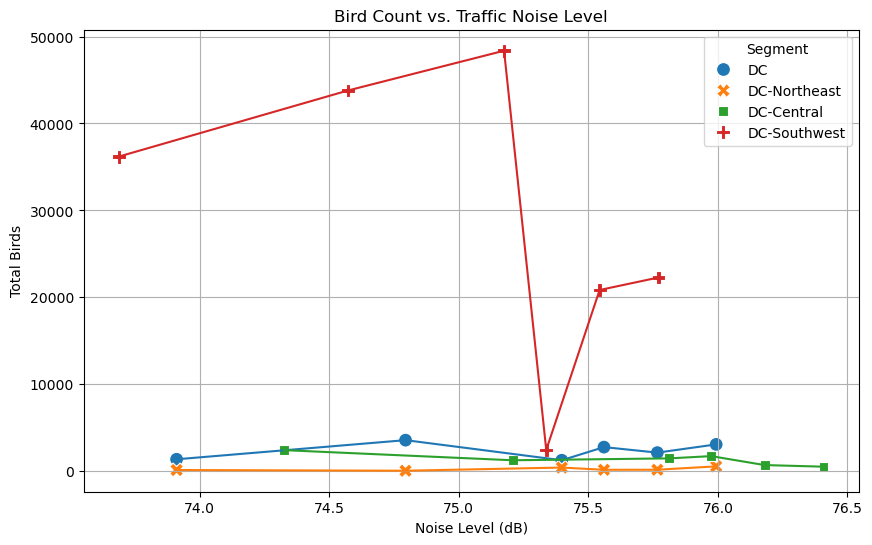

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Noise level (db)', y='total_birds', hue='Segment', style='Segment', s=100)
sns.lineplot(data=df, x='Noise level (db)', y='total_birds', hue='Segment', legend=False)
plt.title("Bird Count vs. Traffic Noise Level")
plt.xlabel("Noise Level (dB)")
plt.ylabel("Total Birds")
plt.grid(True)
plt.show()


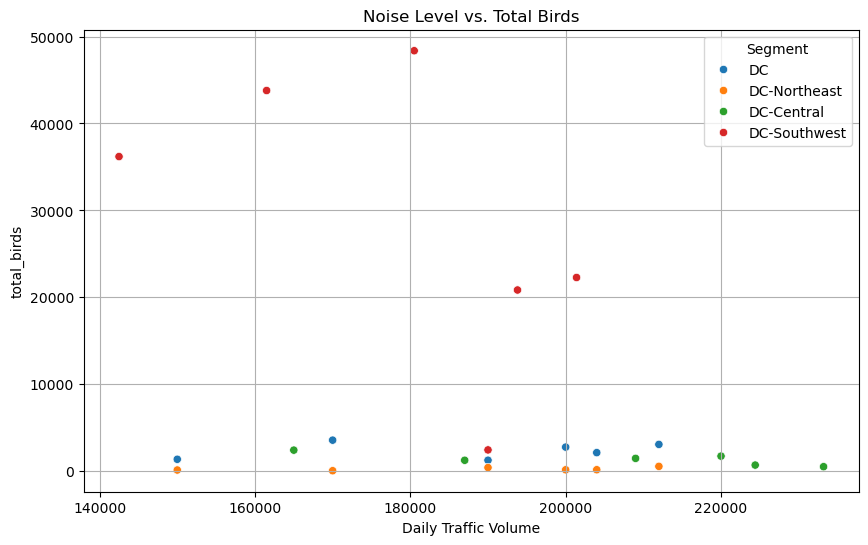

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Daily Traffic Volume', y='total_birds', hue='Segment')
plt.title("Noise Level vs. Total Birds")
plt.grid(True)
plt.show()
